## Iris Classification

### Import required Libraries

In [1]:
import numpy as np    # For Numerical computations
import pandas as pd   # For reading data as DataFrame
import matplotlib.pyplot as plt # Plotting graphs using Matplotlib
import seaborn as sns # For Plotting graphs(Advanced then Matplotlib for visualization in styles)

%matplotlib inline # For showing the Plot for what we have plotted using Matplotlib
sns.set() # Overrides the styles of Matplotlib

/home/sai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
UsageError: unrecognized arguments: # For showing the Plot for what we have plotted using Matplotlib


### Getting Data from Local file

In [5]:
iris_data = pd.read_csv('iris.csv')

### Overview of the Data

### Checking the head of the dataframe in which we have loaded the data

In [6]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Knowing the information about the data

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Describing the data

In [10]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Getting the no. of observations based on species

In [11]:
iris_data['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

### EDA

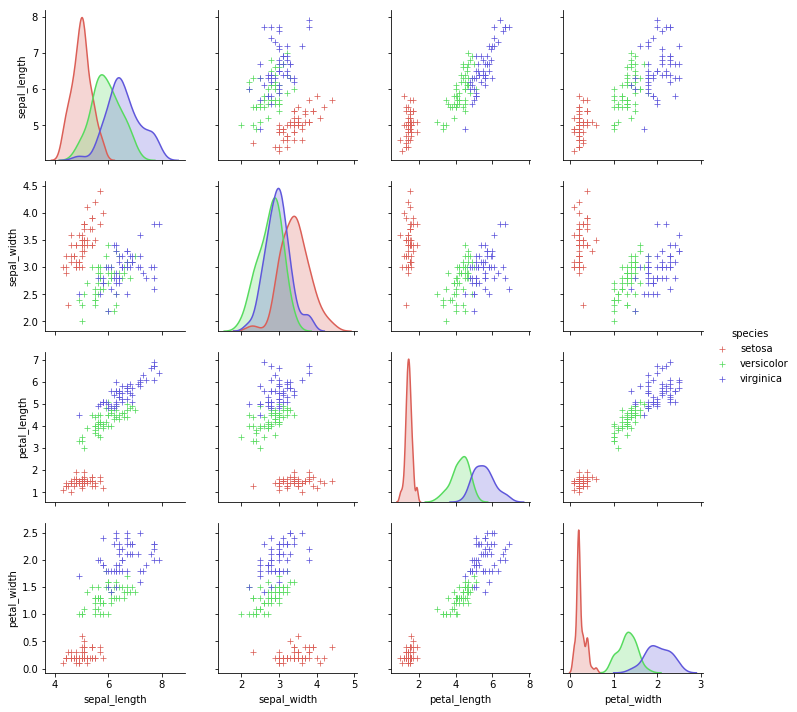

In [20]:
sns.pairplot(iris_data, hue='species', markers='+', palette='hls')

### By seeing above plots, we can say that Setosa features are completely distinct from remaining 2 species

#### sepal_length vs species

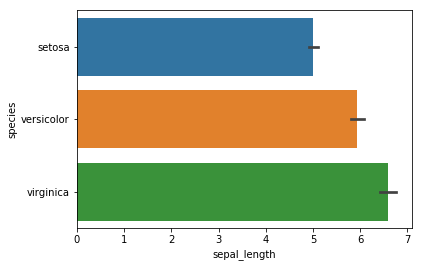

In [24]:
sns.barplot(x='sepal_length', y='species', data=iris_data)

#### sepal_width vs species

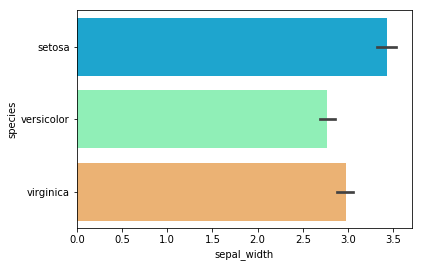

In [29]:
sns.barplot(x='sepal_width', y='species', data=iris_data, palette='rainbow')

#### petal_length vs species

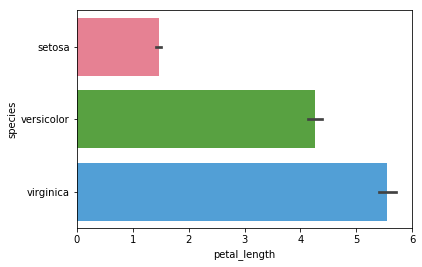

In [27]:
sns.barplot(x='petal_length', y='species', data=iris_data, palette='husl')

#### petal_width vs species

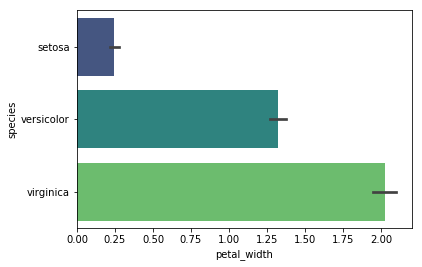

In [28]:
sns.barplot(x='petal_width', y='species', data=iris_data, palette='viridis')

### Model Building

In [30]:
X = iris_data.drop('species', axis=1)
y = iris_data['species']

In [32]:
# Checking the shape of the X(features) and y(Target)
X.shape

(150, 4)

In [33]:
y.shape

(150,)

### Splitting data into Training and Testing

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [37]:
# Checking the shapes of the data we have splitted above
print('X Train:', X_train.shape)
print('X Test:', X_test.shape)
print('y Train:', y_train.shape)
print('y Test:', y_test.shape)

X Train: (105, 4)
X Test: (45, 4)
y Train: (105,)
y Test: (45,)


In [38]:
# Using K-Nearest Neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)

In [67]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [68]:
# Predictions
y_pred = knn.predict(X_test)

In [69]:
# Calculating the Accuracy of the model we have built using KNN
from sklearn import metrics
print('Accuracy:{}'.format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy:97.77777777777777


### We will take some n number of 'k' values to know the best 'k' value

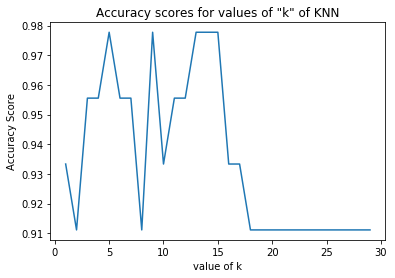

<Figure size 720x360 with 0 Axes>

In [70]:
scores = []

for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(list(range(1,30)),scores)
plt.xlabel('value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy scores for values of "k" of KNN')
plt.figure(figsize=(10,5))
plt.show()

### Now we use Logistic Regression for building model

In [71]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [72]:
logreg.fit(X_train, y_train)

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
y_pred2 = logreg.predict(X_test)

In [74]:
# Knowing the Accuracy of Logistic Regression model applied to our data
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, y_pred2)*100))

Accuracy: 97.77777777777777


In [87]:
# Predicting
knn.predict([[5, 2.1, 3, 0.7]])

array(['versicolor'], dtype=object)

## Findings

#### We have built 2 models(KNN, Logistic Regression) to classify Iris flower whether it belongs to Setosa/ Versi-color/ Virginica based on their Lengh & Width of Sepal & Petals

**We predicted that Iris flower belongs to Setosa/ Versi-Color/ Virginica with 97.77% Accuracy**